### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
#def calc_logloss(y, y_pred):
 #   err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  #  err = np.sum(err)
   # return err
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [9]:
np.log(0.0001)

-9.210340371976182

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [11]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [12]:
z = np.linspace(-10, 10, 101)

In [13]:
probabilities = sigmoid(z)

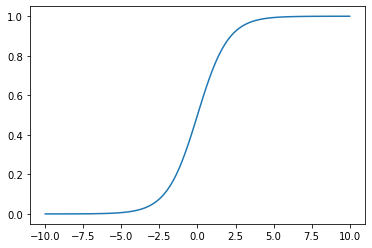

In [14]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        #if i % (iterations / 10) == 0:
        #    print(f"i: {i}, \tW: {W}, \t error: {err}")
    return W,err

In [16]:
W,err = eval_model(X_st, y, iterations=5000, alpha=1e-2)

## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

5*. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

## 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [17]:
# Изначальная функция
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)  #
    return err

In [59]:
#будем фильтровать элементы с 0 и 1

def calc_logloss_no_zeros(y, y_pred):
    err = np.array(y)
    for i in range(len(y)):
        if y_pred[i] == 1:
            err[i] = - y[i]* np.log(y_pred[i])
        elif y_pred[i] == 0:
            err[i] = - (1.0 - y[i])* np.log(1.0 - y_pred[i])
        else:
            err[i] = - (y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i]))

    return np.sum(np.mean(err))

С равним как работает фунция до и после обработки

__Функция__: calc_logloss

In [65]:
# Пример применения   элементов с нулями и единицами
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0])
a=calc_logloss(y1, y_pred1)

# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
b=calc_logloss(y1, y_pred1)

a,b    #gives a warning too

(nan, nan)

__Функция__: calc_logloss_no_zeros

In [63]:
# Пример применения   элементов с нулями и единицами
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0])
a=calc_logloss_no_zeros(y1, y_pred1)

# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
b=calc_logloss_no_zeros(y1, y_pred1)

a,b # без ошибок

(0.0, 0.0)

## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Подсчитаем оптимальные значение функции LOG LOSS для количестов итераций и значение альфа/ламбда (шаги)

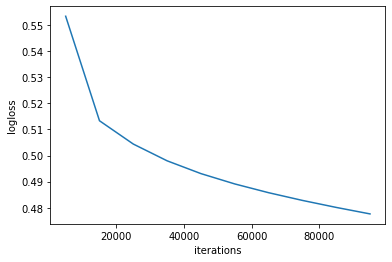

In [35]:
errors = []
iterations_arr = np.arange(5000,  100000, 10000)            
for iterations in iterations_arr:
    W, err = eval_model(X_st, y, iterations, alpha=1e-4)
    errors.append(err)


plt.plot(iterations_arr, errors)
plt.xlabel('iterations')
plt.ylabel('logloss')
plt.show()

In [36]:
print(iterations_arr,"\n\n"), 
print(errors)

[ 5000 15000 25000 35000 45000 55000 65000 75000 85000 95000] 


[0.5532737788236778, 0.5132955796283907, 0.5043808368197887, 0.49797001926551604, 0.4930753008985923, 0.4891259120138777, 0.48577788740449945, 0.48282509905952964, 0.48014349171658577, 0.47765738775436145]


* До 10 000 итераций самое динамичное падение LOG LOSS функции
* С 10 000 до 50 000 итераций падение LOG LOSS функция менее активно меняет свою траекторию

После 10 000 итераций мой компьютер зависает поэтому возьму 10 000 итераций как параметр

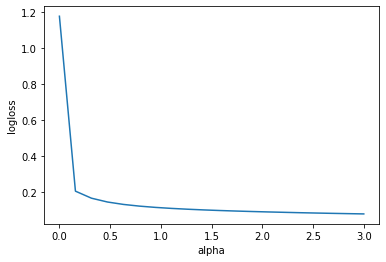

In [34]:
errors = []
step_arr = np.linspace(0, 3, 20)
for alpha in step_arr:
    W, err = eval_model(X_st, y, iterations=10000, alpha=alpha)
    errors.append(err)

plt.plot(step_arr, errors)
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.show()

In [67]:
print(alpha,"\n", errors)

3.0 
 [0.5532737788236778, 0.5132955796283907, 0.5043808368197887, 0.49797001926551604, 0.4930753008985923, 0.4891259120138777, 0.48577788740449945, 0.48282509905952964, 0.48014349171658577, 0.47765738775436145]


После значения альфа = 3. появляются ошибки NAN, поэтому я возьму 3 как максимальное значение альфы

In [68]:
W, err = eval_model(X_st, y, iterations=10000, alpha=3)

print(f'W coeffients:\t {W}, \nerror:  \t \t{err}')

W coeffients:	 [-53.85695053  -5.12989729 -14.81204282  43.7486393 ], 
error:  	 	0.08037291044577827


## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [69]:
# вычислеине вероятности принадлежности объекта классу 1

def calc_pred_proba(W, X):
    z = np.dot(W, X)
    return sigmoid(z)

y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

array([3.25527471e-01, 1.07126661e-03, 1.00000000e+00, 2.78900228e-11,
       9.76817718e-01, 8.47080139e-03, 1.00000000e+00, 5.37576806e-03,
       6.89729570e-01, 1.00000000e+00])

### ВОПРОС 
Задание либо очень простое либо я что то не понял, у нас в eval_model функции изначльно  в уровнение 
 __y_pred = sigmoid(z)__ высчитовалась вероятность по классу "+1" $P(y=1|x)$
поэтому я повторил то что мы сделали в прошлой функции

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [71]:
# отнесение объекта к определённому классу с порогом alpha
def predict_y_values(W, X):

    
    z = np.dot(W, X)
    A = sigmoid(z)
    y_predicted = np.empty_like(z)

#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0
    
    return y_predicted

In [73]:
y_predicted = predict_y_values(W, X_st)

print('predicted_y:\t',predict_y_values(W, X_st), '\ny:\t\t',y)

print('\n\n','y_predicted unclassified\n',calc_pred_proba(W, X_st))

predicted_y:	 [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.] 
y:		 [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


 y_predicted unclassified
 [3.25527471e-01 1.07126661e-03 1.00000000e+00 2.78900228e-11
 9.76817718e-01 8.47080139e-03 1.00000000e+00 5.37576806e-03
 6.89729570e-01 1.00000000e+00]


### 5*. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

In [74]:
# доля правильных ответов
def accuracy (y, y_predicted):
    
    accuracy_ = 100.0 - np.mean(np.abs(y_predicted - y)*100.0)

    return accuracy_

In [75]:
acc= accuracy(y,y_predicted)
print('точность:',acc)

точность: 100.0


### Матрица ошибок
|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |   TP    |   FP   |
| __$$a(x) = -1$$__ |   FN    |   TN   |
    
В матрице сверху отложены истинные ответы, слева - ответы алгоритма. Когда алгоритм относит объект к классу "+1", говорят, что он срабатывает, а когда к "-1", - пропускает. Если алгоритм сработал (дал положительный ответ) и объект действительно относится к классу "+1", говорят, что имеет место верное срабатывание/верный положительный ответ (True Positive, TP), а если объект не относится к классу "+1", это ложное срабатывание (False Positive, FP). Если алгоритм пропускает объект, а его истинный класс "+1", это ложный пропуск/ложный негативные ответ (False Negative, FN), а если истинный класс объекта "-1", имеет место истинный пропуск (True Negative, TN). При такой классификации уже есть два вида ошибок - ложные срабатывания и ложные пропуски. По главной диагонали в матрице ошибок располагаются верные ответы, по побочной - неверные.

In [76]:
def confusion_matrix(y, y_pred):
   
    TP= 0
    FP= 0
    FN= 0
    TN= 0
    
   
    
    for i in range(len(y)):
        if y_pred[i] == 1 and y[i] != 0:
            TP += 1
        elif y_pred[i] == 1 and y[i] != 1:
            FP += 1
        elif y_pred[i] == 0 and y[i] != 1:
            TN += 1
        else:
            FN += 1
   # c_matrix = np.array([[TP,FP],
    #                     [FN,TN]]) 
    return np.array([[TP,FP],
                     [FN,TN]]) 

In [77]:
confusion_m = confusion_matrix(y, y_pred)
[TP, FP], [FN, TN] = confusion_m
confusion_m

array([[5, 0],
       [0, 5]])

### Точность и полнота

В классификации часто используются две метрики - _точность_ и _полнота_.

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса "+1".

In [78]:
#Точтность            
Precision = TP/(TP+FP)

# Полнота
Recall = TP/(TP+FN)

Precision, Recall

(1.0, 1.0)

__*F-мера*__, которая представляет собой среднее гармоническое между точностью и полнотою

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю. По сути, F-мера является сглаженной версией минимума из точности и полноты (см. графики).

In [79]:
# F-Score
F = 2*Precision*Recall / (Precision+Recall)
F

1.0

### 6. ВОПРОС:Могла ли модель переобучиться? Почему?

#### Да, вероятность всегда есть особенно когда получаешь высокие показатели с тестовыми данные.  У нас показатели высокие так что могу сказать что такая вероятность у нас есть.